# Latar Belakang

Transjakarta adalah moda transportasi umum yang berfokus kepada pelayanan dalam kota. Transjakarta sudah berdiri sejak 20 tahun yang lalu dan semua element masyarakat sudah merasakan dampak baik dari moda transportasi ini, akan tetapi ada dari sebagian penumpang transjakarta ada yang tidak merasakan dampak baik dari fasilitas transjakarta diantaranya usia lanjut dan masih banyak pengamatan lainnya

# Perumusan Masalah 

1. transjakarta ingin mengetahui penumpang mana saja yang belum mendapatkan hak & prioritas yang telah di tentukan oleh transjakarta 
2. memahami pola perjalanan penumpah di berbagai koridor
3. menilai waktu sibuk dan area dengan jumlah penumpang tertinggi
4. menganalisis preferensi penumpang terhadap titik masuk dan keluar tertentu
5. megetahui fasilitas IOT yang sering missed pada tapsout berdasarkan koridor


# Goals

1. Merancang rute atau jadwal baru berdasarkan kebutuhan dan preferensi penumpang
2. Membuat rencana investasi berdasarkan data proyeksi evaluasi kapasitas saat ini
3. Menyusun strategi untuk meningkatkan efisiensi operasional secara keseluruhan
4. Menilai data untuk mengidentifikasi titik-titik potensial risiko keselamatan.
5. Memprioritaskan proyek infrastruktur untuk mendukung pertumbuhan jangka panjang

## Dataset General Information

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from geopy.geocoders import Nominatim
import sklearn
import statsmodels
import math

import warnings 
warnings.filterwarnings('ignore')

In [2]:
tj = pd.read_csv("Transjakarta.csv")
tj

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


menambahkan kolom umur ke DataFrame dan mengonversi kolom waktu ('tapInTime' dan 'tapOutTime') ke tipe data datetime untuk kemudahan pemrosesan waktu di dalam analisis data.

In [3]:
tj['Umur'] = 2023-tj['payCardBirthDate']
tj['tapInTime'] = pd.to_datetime(tj['tapInTime'])
tj['tapOutTime'] = pd.to_datetime(tj['tapOutTime'])

In [4]:
tj.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'Umur'],
      dtype='object')

In [5]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
Umur                   0
dtype: int64

In [6]:
tj[(tj['corridorID'].isna()) | (tj['corridorName'].isna())]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,Umur
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0,32
38,RLLZ887W3V14WZ,4947438345710982,dki,Rahayu Rahayu,F,2006,5M,NaN,1.0,B02994P,...,16,2023-04-03 05:29:43,B05707P,Term. Kampung Melayu 2,-6.224516,106.86685,30.0,2023-04-03 05:58:35,3500.0,17
39,JJEK861K6E37KF,3539535695881465,dki,"Dr. Zulfa Tamba, S.E.I",M,1986,2,NaN,0.0,P00202,...,9,2023-04-03 05:28:22,P00137,Monas,-6.176248,106.82286,19.0,2023-04-03 06:02:36,3500.0,37
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,2011,T21,NaN,1.0,B00589P,...,3,2023-04-03 05:43:48,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-03 06:09:12,20000.0,12
61,TWAK265Z0M88QR,213155263532652,emoney,Restu Waluyo,F,1984,12A,NaN,0.0,B05324P,...,9,2023-04-03 06:13:03,P00138,Museum Fatahillah,-6.133930,106.81209,18.0,2023-04-03 06:50:23,3500.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37797,HBLN935K0C66OQ,4667337468542,online,"drg. Bala Yolanda, S.Farm",M,1984,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang,1.0,B04607P,...,59,2023-04-29 19:18:55,B02223P,Marlindo Marunda,-6.121746,106.95715,61.0,2023-04-29 20:02:28,0.0,39
37815,OSYS465Q5O68VD,3534140838249087,dki,Saka Pradipta,M,2009,JAK.56,NaN,1.0,B04394P,...,45,2023-04-15 18:26:35,B05498P,St. Pesing,-6.161726,106.77127,52.0,2023-04-15 21:01:27,0.0,14
37824,TMCQ904W0L70TY,4741860768238,online,"drg. Argono Nainggolan, S.Kom",F,1992,S21,NaN,1.0,B01094P,...,11,2023-04-07 09:25:03,P00185,Pondok Indah 2,-6.267231,106.78365,13.0,2023-04-07 12:12:33,3500.0,31
37838,GTLM961T1U29JA,4204405669287580,dki,"Saka Wijaya, S.H.",M,1995,NaN,NaN,1.0,B03520P,...,12,2023-04-28 12:30:26,B04078P,Sbr. Masjid Pasmar Marunda,-6.115928,106.95189,64.0,2023-04-28 13:59:57,0.0,28


# Data Understanding

Sebelum masuk ke dalam analisis, penting untuk memahami lebih dalam dataset yang kita miliki dalam tahap pemahaman data. Dengan melakukan proses ini, kita dapat mengidentifikasi anomali-anomali yang mungkin ada dalam dataset dan perlu ditangani pada tahap pembersihan data. Setiap tindakan untuk menangani anomali akan disertai dengan justifikasi, baik berdasarkan pengetahuan domain maupun statistik.

Pertama-tama, mari kita tinjau informasi mengenai usia dalam dataset TransJakarta.

Dataset ini berisi informasi terkait perjalanan penumpang, acces card, fasilitas halte dengan sebaran lainnya, Ada 14 kolom di dalam dataset Transjakarta, yaitu:  

transID: ID transaksi unik untuk setiap transaksi.

payCardID: Identifikasi utama pelanggan yang digunakan sebagai tiket masuk dan keluar.

payCardBank: Nama penerbit kartu bank yang terkait dengan kartu pembayaran pelanggan.

payCardName: Nama pelanggan yang tertanam dalam kartu.

payCardSex: Jenis kelamin pelanggan yang tertanam dalam kartu.

payCardBirthDate: Tahun kelahiran pelanggan.

corridorID: ID koridor atau ID rute yang digunakan sebagai kunci untuk pengelompokan rute.

corridorName: Nama koridor atau nama rute yang mencakup informasi tentang awal dan akhir setiap rute.

direction: Nilai 0 untuk pergi (Go) dan 1 untuk kembali (Back), menunjukkan arah perjalanan rute.

tapInStops: ID titik masuk (entrance) yang digunakan untuk mengidentifikasi nama-nama titik masuk.

tapInStopsName: Nama titik masuk (entrance) di mana pelanggan melakukan tap in.

tapInStopsLat: Garis lintang (latitude) dari titik masuk.

tapInStopsLon: Garis bujur (longitude) dari titik masuk.

stopStartSeq: Urutan dari titik-titik perhentian, berkaitan dengan arah perjalanan.

tapInTime: Waktu tap in, termasuk tanggal dan waktu.

tapOutStops: ID titik keluar (exit) yang digunakan untuk mengidentifikasi nama-nama titik keluar.

tapOutStopsName: Nama titik keluar (exit) di mana pelanggan melakukan tap out.

tapOutStopsLat: Garis lintang (latitude) dari titik keluar.

tapOutStopsLon: Garis bujur (longitude) dari titik keluar.

stopEndSeq: Urutan dari titik-titik perhentian, berkaitan dengan arah perjalanan.

tapOutTime: Waktu tap out, termasuk tanggal dan waktu.

payAmount: Jumlah pembayaran yang dilakukan oleh pelanggan, yang bisa jadi beberapa transaksi gratis dan beberapa yang berbayar.

# Duplicate
Tidak terdapat data yang duplikat pada data set ini 

In [7]:
tj[tj.duplicated()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,Umur


In [8]:
tj['payAmount'].fillna(0,inplace=True)
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
Umur                   0
dtype: int64

# Missing Value (%)

Persentase missing value tiap kolom

In [9]:
tj.isna().sum()/tj.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           0.000000
Umur                0.000000
dtype: float64

Mengganti tipe data dari object ke date time

In [10]:
tj['Umur'] = 2023-tj['payCardBirthDate']
tj['tapInTime'] = pd.to_datetime(tj['tapInTime'])
tj['tapOutTime'] = pd.to_datetime(tj['tapOutTime'])

In [11]:
tj['DayInInt'] = tj['tapInTime'].dt.day_of_week
replace_dict = {0:'Senin',1: 'Selasa', 2: 'Rabu',3:'Kamis',4:'Jumat',5:'Sabtu',6:'Minggu'}
tj['DayIn'] = tj['DayInInt'].replace(replace_dict)
tj['DayIn']

0         Senin
1         Senin
2         Senin
3         Senin
4         Senin
          ...  
37895     Jumat
37896    Selasa
37897    Selasa
37898     Sabtu
37899      Rabu
Name: DayIn, Length: 37900, dtype: object

In [12]:
tj['DayOutInt'] = tj['tapOutTime'].dt.day_of_week
replace_dict = {0:'Senin',1: 'Selasa', 2: 'Rabu',3:'Kamis',4:'Jumat',5:'Sabtu',6:'Minggu'}
tj['DayOut'] = tj['DayOutInt'].replace(replace_dict)
tj['DayOut']

0         Senin
1         Senin
2         Senin
3         Senin
4         Senin
          ...  
37895     Jumat
37896    Selasa
37897    Selasa
37898     Sabtu
37899      Rabu
Name: DayOut, Length: 37900, dtype: object

In [13]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
Umur                   0
DayInInt               0
DayIn                  0
DayOutInt           1344
DayOut              1344
dtype: int64

1. Analisa awal untuk melihat apakah target fasilitas transjakarta terhadap lansia sudah tepat sasaran

Sebaran Umur

Menampilkan total pelanggan yang di kelompokkan berdasarkan umur

In [14]:

age_bins = range(0, 81, 20)
tj['GrupUmur'] = pd.cut(tj['Umur'], bins=age_bins, labels=[f'{i}-{i+19}' for i in age_bins[:-1]])
result = tj.groupby(['GrupUmur'])['Umur'].count()
print(result)
tj['GrupUmur']

GrupUmur
0-19      7964
20-39    20087
40-59     9076
60-79      773
Name: Umur, dtype: int64


0         0-19
1        20-39
2        20-39
3        40-59
4        40-59
         ...  
37895     0-19
37896    40-59
37897    40-59
37898    40-59
37899    20-39
Name: GrupUmur, Length: 37900, dtype: category
Categories (4, object): ['0-19' < '20-39' < '40-59' < '60-79']

menghasilkan jumlah frekuensi setiap nilai unik dari 'corridorName' pada baris-baris di mana 'GrupUmur' adalah '0-19'. Ini memberikan informasi tentang seberapa sering koridor tertentu digunakan oleh individu dengan rentang usia 0-19 dalam DataFrame tj.

In [15]:
tj[tj['GrupUmur']=='0-19']['corridorName'].value_counts()

corridorName
Cibubur - Balai Kota                 153
Pinang Ranti - Pluit                 144
Pulo Gadung - Monas                  132
Kampung Rambutan - Pondok Gede       127
Puri Beta - Pancoran Barat           120
                                    ... 
Kalideres - Puri Kembangan             1
Ragunan - MH Thamrin                   1
Senen - Tanah Abang                    1
Ragunan - MH Thamrin via Kuningan      1
Term. Pulo Gadung - Lampiri            1
Name: count, Length: 209, dtype: int64

Membuat Variable baru untuk pelanggan lansia/diatas 60 tahun

In [16]:
lansia = tj[tj['Umur']>=60]

Membuata Variable dari lansia yang koridornya tidak NAN

In [17]:
corridorlansia = lansia[lansia['corridorID'].notna()]
len(corridorlansia)

751

Membuat Variable baru jaklingko

In [18]:
jaklansia = corridorlansia[corridorlansia['corridorID'].str.contains('JAK')]
len(jaklansia)

187

Membuat variable baru transjakarta

In [19]:
haltelansia = corridorlansia[~corridorlansia['corridorID'].str.contains('JAK')]
len(haltelansia)

564

Melihat usia pengguna TJ

In [20]:
tj['Umur'].unique()

array([15, 26, 31, 45, 41, 30, 49, 32, 19, 39, 35, 21, 48, 12, 20, 42, 14,
       40, 24, 16, 44, 63, 28, 22, 33, 55, 38, 13, 34, 17, 37, 58, 18, 57,
       29, 51, 54, 53, 23, 70, 46, 11, 36, 27, 52, 67, 43, 25, 50, 77, 47,
       64, 56, 72, 66, 75, 62, 59, 60, 61, 74, 69, 76, 71, 65, 68, 73],
      dtype=int64)

1. mengambil hari dari varible tap in time 
2. mengubah type data 

In [21]:
tj['DayInInt'] = tj['tapInTime'].dt.day_of_week
replace_dict = {0:'Senin',1: 'Selasa', 2: 'Rabu',3:'Kamis',4:'Jumat',5:'Sabtu',6:'Minggu'}
tj['DayIn'] = tj['DayInInt'].replace(replace_dict)
tj['DayIn']

0         Senin
1         Senin
2         Senin
3         Senin
4         Senin
          ...  
37895     Jumat
37896    Selasa
37897    Selasa
37898     Sabtu
37899      Rabu
Name: DayIn, Length: 37900, dtype: object

In [22]:
tj['DayOutInt'] = tj['tapOutTime'].dt.day_of_week
replace_dict = {0:'Senin',1: 'Selasa', 2: 'Rabu',3:'Kamis',4:'Jumat',5:'Sabtu',6:'Minggu'}
tj['DayOut'] = tj['DayOutInt'].replace(replace_dict)
tj['DayOut']

0         Senin
1         Senin
2         Senin
3         Senin
4         Senin
          ...  
37895     Jumat
37896    Selasa
37897    Selasa
37898     Sabtu
37899      Rabu
Name: DayOut, Length: 37900, dtype: object

In [23]:
tj.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
Umur                   0
DayInInt               0
DayIn                  0
DayOutInt           1344
DayOut              1344
GrupUmur               0
dtype: int64

2. Halte Dengan 'Tap In' (Lansia)

Kodingan dibawah menggambarkan langkah-langkah untuk menghitung jumlah penumpang lansia yang melakukan tap in di setiap halte, kemudian menampilkan lima halte dengan jumlah penumpang lansia terbanyak.

In [24]:
tapinlansia = haltelansia['tapInStopsName'].value_counts().head()
tapinlansia

tapInStopsName
MH Thamrin                   21
Masjid Agung                 21
Polda Metro Jaya             20
Sekolah Sumbangsih           20
Pancoran Barat Arah Timur    20
Name: count, dtype: int64

kita dapat dengan jelas melihat dan memahami lima halte dengan jumlah penumpang lansia terbanyak dalam bentuk grafik bar horizontal.

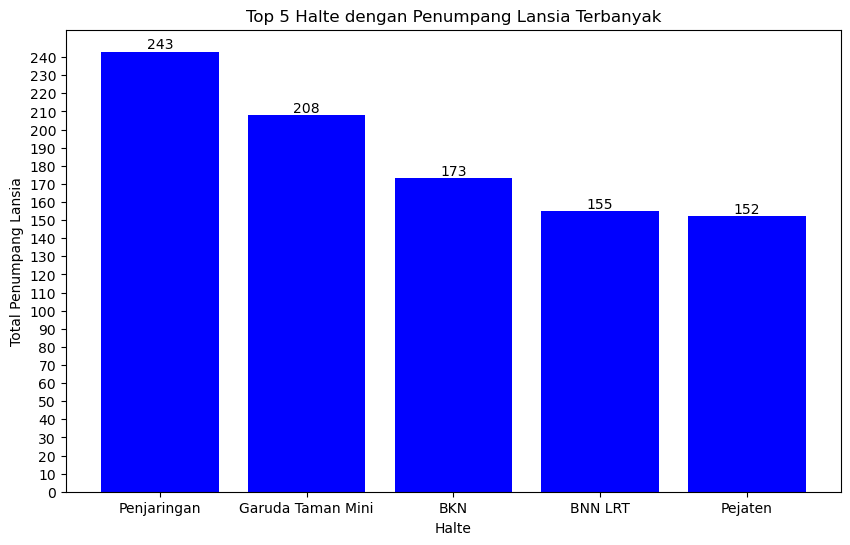

In [25]:
tapin_lansia = tj.groupby('tapInStopsName')['Umur'].count()

top_5_halte = tapin_lansia.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
bar_plot = plt.bar(top_5_halte.index, top_5_halte.values, color='blue')

plt.ylabel('Total Penumpang Lansia')
plt.xlabel('Halte')
plt.title('Top 5 Halte dengan Penumpang Lansia Terbanyak')

for index, value in enumerate(top_5_halte.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.yticks(range(0, max(top_5_halte.values) + 1, 10))

plt.show()


Kodingan di bawah mencari jumlah penumpang lansia yang melakukan tap out di setiap halte.

In [26]:
tapoutlansia = haltelansia['tapOutStopsName'].value_counts().head(10)
tapoutlansia

tapOutStopsName
Cibubur Junction             20
Masjid Agung                 20
BKN                          20
Kampung Rambutan             20
Tirtayasa                    20
Karet Sudirman               19
BNN LRT                      19
Ampera 4                     19
Masjid Jami Al Makmur 2      19
Bank Indonesia Arah Utara    19
Name: count, dtype: int64

Kode ini bertujuan untuk melihat diagram batang yang memberikan informasi visual tentang jumlah total penumpang lansia pada setiap halte selama transaksi tap-out, dengan label yang menyatakan nilai sebenarnya di atas setiap batang.

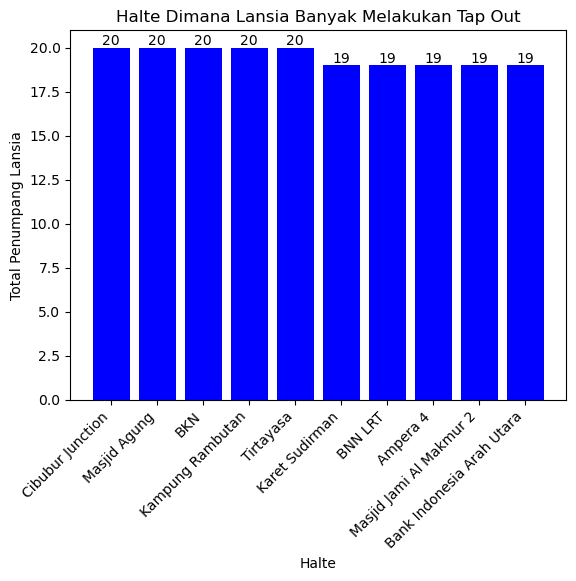

In [27]:
plt.bar(tapoutlansia.index, tapoutlansia.values, color='blue')

plt.ylabel('Total Penumpang Lansia')
plt.xlabel('Halte')
plt.title('Halte Dimana Lansia Banyak Melakukan Tap Out')

for index, value in enumerate(tapoutlansia.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

plt.show()

Kode dibawah membuat diagram batang untuk memvisualisasikan 10 halte teratas dengan jumlah penumpang lansia tertinggi selama transaksi tap-out. Batang mewakili jumlah total penumpang lansia di setiap halte, dan nilai yang sesuai ditampilkan di atas batang.

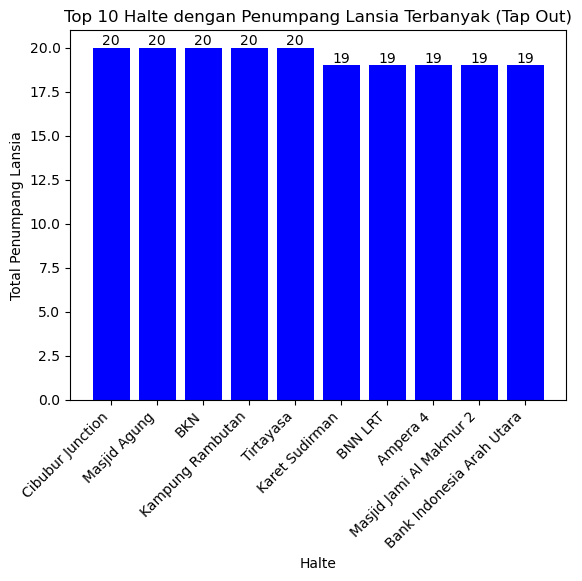

In [28]:
top_10_halte = tapoutlansia.sort_values(ascending=False).head(10)


plt.bar(top_10_halte.index, top_10_halte.values, color='blue')

plt.xlabel('Halte')
plt.ylabel('Total Penumpang Lansia')
plt.title('Top 10 Halte dengan Penumpang Lansia Terbanyak (Tap Out)')

for index, value in enumerate(top_10_halte.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

plt.show()


In [29]:
jalurCorridorlansia = haltelansia['corridorName'].value_counts().head()
jalurCorridorlansia

corridorName
Ragunan - Gelora Bung Karno     74
Blok M - Kota                   41
PGC 2 - Grogol 2                40
Kebayoran Lama - Tanah Abang    38
Cibubur - BKN                   38
Name: count, dtype: int64

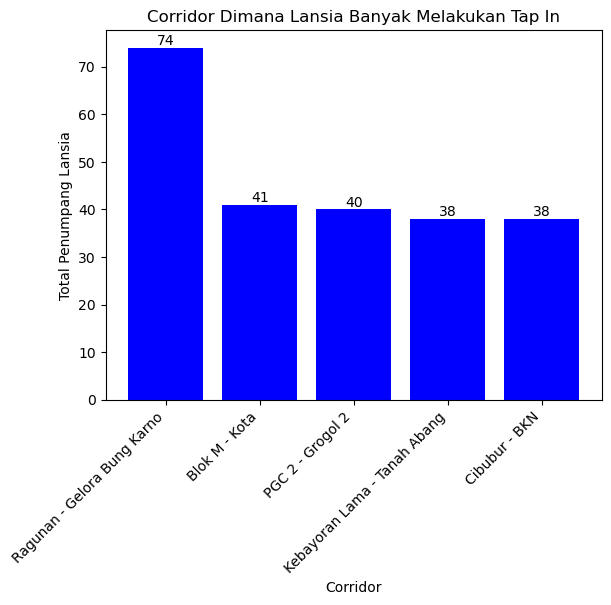

In [30]:
plt.bar(jalurCorridorlansia.index, jalurCorridorlansia.values, color='blue')

plt.ylabel('Total Penumpang Lansia')
plt.xlabel('Corridor')
plt.title('Corridor Dimana Lansia Banyak Melakukan Tap In')

for index, value in enumerate(jalurCorridorlansia.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

plt.show()


3. Hari dimana lansia banyak menggunakan fasilitas transjakarta

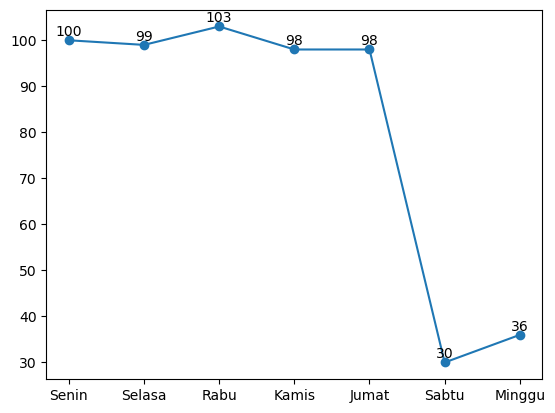

In [31]:
harilansia = haltelansia['DayInInt'].value_counts()
harilansia = harilansia.sort_index()
for index, value in zip(harilansia.index, harilansia):
    plt.text(index, value + 1, value, ha='center')
plt.plot(['Senin','Selasa','Rabu','Kamis','Jumat','Sabtu','Minggu'],harilansia.values,marker='o')
plt.show()

3. Fasilitas dengan tap out dengan parameter dari coridor

In [32]:
tj[tj['tapOutStops'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,Umur,DayInInt,DayIn,DayOutInt,DayOut,GrupUmur
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,NaN,NaN,NaT,0.0,49,0,Senin,NaN,NaN,40-59
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,NaN,NaN,NaT,0.0,28,0,Senin,NaN,NaN,20-39
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,...,NaN,NaN,NaT,20000.0,42,0,Senin,NaN,NaN,40-59
89,QMHC825R0K38KM,3537543297101185,dki,Samsul Ramadan,M,1966,M11,NaN,1.0,P00158,...,106.94537,7.0,2023-04-03 06:52:14,3500.0,57,0,Senin,0.0,Senin,40-59
130,JUKK703H7F00XH,570918242399,flazz,Mumpuni Gunarto,F,1998,10D,Kampung Rambutan - Tanjung Priok,0.0,P00035,...,NaN,NaN,NaT,3500.0,25,0,Senin,NaN,NaN,20-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37796,UJTW104Z9P85GX,6507084113625619,dki,Kairav Yulianti,F,2002,8M,S. Parman - Tanah Abang,0.0,B03062P,...,NaN,NaN,NaT,3500.0,21,6,Minggu,NaN,NaN,20-39
37799,GRKE798M1S93HC,4897976988760145,dki,Drs. Labuh Permata,F,2006,JAK.41,Kampung Melayu - Pulo Gadung,0.0,B02707P,...,NaN,NaN,NaT,0.0,17,2,Rabu,NaN,NaN,0-19
37878,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,...,106.80370,7.0,2023-04-16 10:58:11,20000.0,58,6,Minggu,6.0,Minggu,40-59
37887,UELP204M1S64QX,4068989702474318,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,P00269,...,106.86858,9.0,2023-04-04 15:38:58,3500.0,43,1,Selasa,1.0,Selasa,40-59


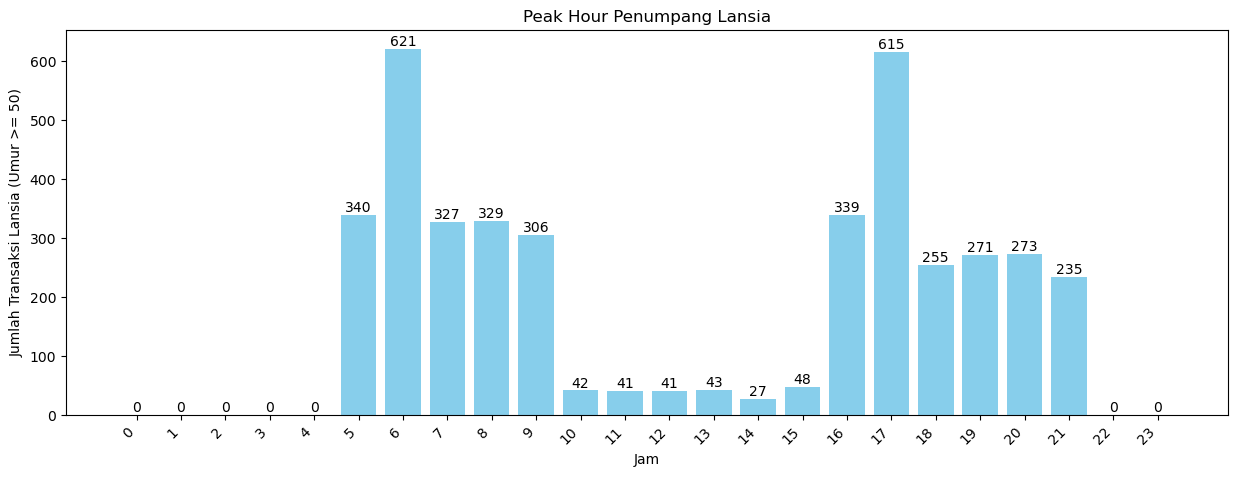

In [33]:
tj['tapInTime'] = pd.to_datetime(tj['tapInTime'], format='%H:%M')

lansia_df = tj[tj['Umur'] >= 50]


transaction_count_per_hour = lansia_df.groupby(lansia_df['tapInTime'].dt.hour)['Umur'].count()

transaction_count_per_hour = transaction_count_per_hour.reindex(range(0, 24), fill_value=0)

plt.figure(figsize=(15, 5))
bar_plot = plt.bar(transaction_count_per_hour.index, transaction_count_per_hour.values, color='skyblue')

plt.xticks(rotation=45, ha="right")

plt.xlabel('Jam')
plt.ylabel('Jumlah Transaksi Lansia (Umur >= 50)')
plt.title('Peak Hour Penumpang Lansia')

for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(transaction_count_per_hour.index)

plt.show()

In [34]:
y = tj['corridorName'].value_counts().head()

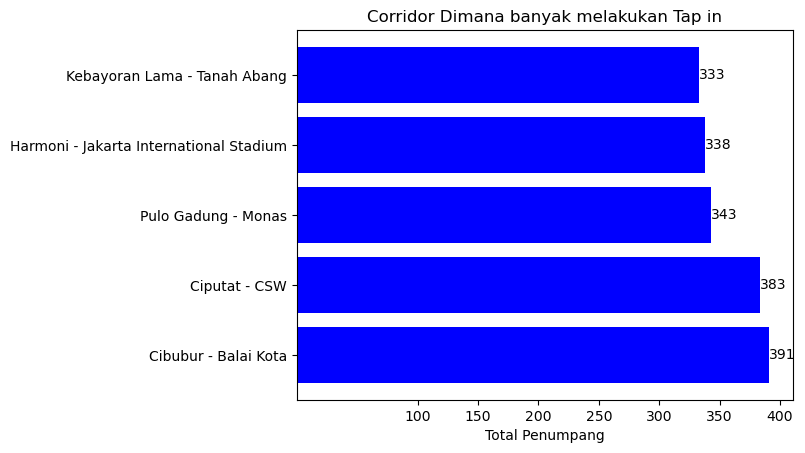

In [35]:
plt.barh(y.index, y.values, color='blue')

plt.xlabel('Total Penumpang')
plt.title('Corridor Dimana banyak melakukan Tap in')

for index, value in enumerate(y.values):
    plt.text(value, index, value, va='center')
plt.xticks(range(100, 401, 50))

plt.show()

# Uji Statistik 

Membuat dataframe baru, perbaris isinya total trip hari ini, tapi ada kolom tambahan isinya hari kerja/weekend

In [36]:
import scipy.stats as stats
tj["tapInTime"]=pd.to_datetime(tj["tapInTime"])
tj["minggutapin"]=tj["tapInTime"].dt.isocalendar().week
tj["haritapin"]=tj["tapInTime"].dt.day_of_week
def hari(x):
    if x==6 or x==5:
        return "weekend"
    else:
        return "hari kerja"
tj["harikerja"]=tj["haritapin"].apply(hari)

Membuat barplot buat liat perbedaan rata/rata atau median trip antara hari kerja/weekend 

Visualisasi ini memberikan gambaran distribusi median frekuensi aktivitas pada hari kerja dalam dataset TJ. Jika garis vertikal pada batang lebih tinggi pada hari kerja, menandakan aktivitas cenderung lebih tinggi pada hari tersebut. Sebaliknya, garis yang lebih rendah pada hari kerja dapat menunjukkan aktivitas yang lebih rendah pada hari-hari tersebut.

,haritapin,harikerja,count
2,0,hari kerja,6838
3,1,hari kerja,6835
1,2,hari kerja,6840
4,3,hari kerja,6834
0,4,hari kerja,6851
6,5,weekend,1830
5,6,weekend,1872


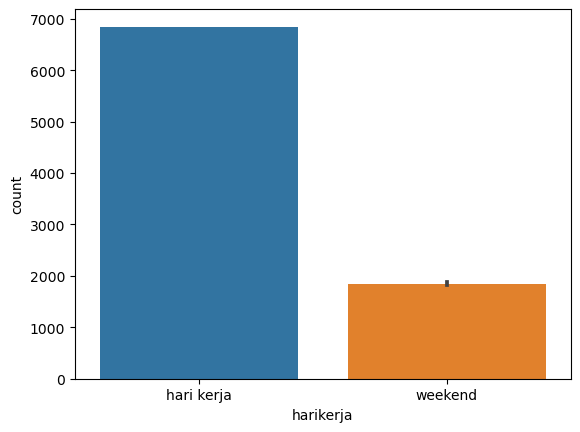

In [37]:
data=tj[["haritapin","harikerja"]].value_counts().reset_index().sort_values(by=["haritapin"])
sns.barplot(data=data,x="harikerja",y="count")
data

data terdistribusi secara rata

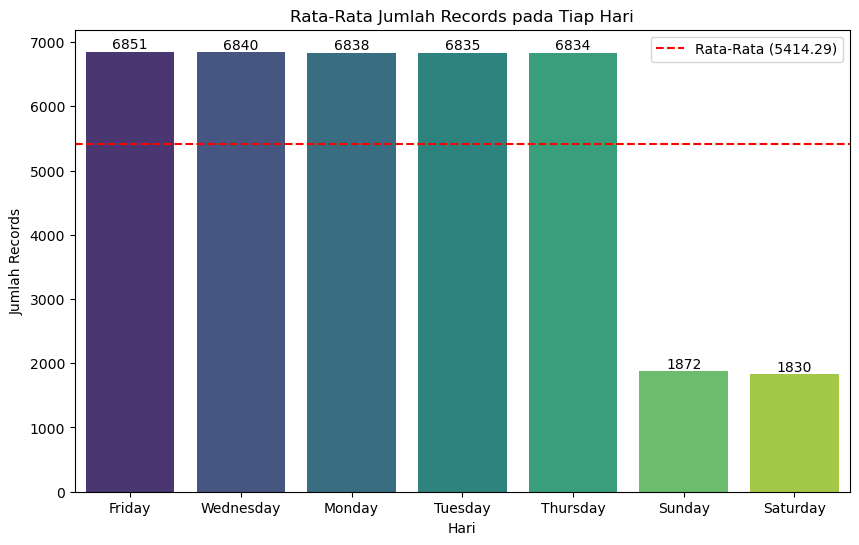

In [60]:
tj['tapInTime'] = pd.to_datetime(tj['tapInTime'])

tj['hari'] = tj['tapInTime'].dt.day_name()
records_per_day = tj['hari'].value_counts().reset_index()
avg_records_per_day = tj['hari'].value_counts().mean()

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=records_per_day, x='hari', y='count', palette='viridis')  # Mengganti fungsi dari sns.histplot ke sns.barplot
plt.axhline(y=avg_records_per_day, color='red', linestyle='--', label=f'Rata-Rata ({avg_records_per_day:.2f})')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Rata-Rata Jumlah Records pada Tiap Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Records')

plt.legend()
plt.show()


secara visual terlihat bahwa aktivitas lebih tinggi pada hari kerja, dan sekarang kita akan menggunakan uji statistik untuk memperkuat argumen ini

In [39]:
data

,haritapin,harikerja,count
2,0,hari kerja,6838
3,1,hari kerja,6835
1,2,hari kerja,6840
4,3,hari kerja,6834
0,4,hari kerja,6851
6,5,weekend,1830
5,6,weekend,1872


In [40]:
hari_kerja=data[data["harikerja"]=="hari kerja"]["count"]
weekend=data[data["harikerja"]=="weekend"]["count"]

statistik_uji, p_value = stats.mannwhitneyu(hari_kerja, weekend, alternative='greater')

print(f'Statistik Uji Mann-Whitney: {statistik_uji}')
print(f'Nilai p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('(Tolak H0)Kelompok pertama secara signifikan lebih besar dari kelompok kedua.')
else:
    print('(Gagal Tolak H0)Tidak terdapat bukti yang cukup untuk menyatakan bahwa kelompok pertama lebih besar dari kelompok kedua.')

Statistik Uji Mann-Whitney: 10.0
Nilai p: 0.047619047619047616
(Tolak H0)Kelompok pertama secara signifikan lebih besar dari kelompok kedua.


ini menunjukkan bahwa tempat ini sering digunakan oleh pekerja, seperti di halte yang memiliki vending machine kopi. Atau barang atau layanan lain yang biasa dibeli oleh orang-orang kantor ketika merasa lelah atau lelah.


# Kesimpulan dan Rekomendasi untuk Analisis Data Penumpang Transjakarta

Berdasarkan analisis data penumpang Transjakarta, berikut adalah kesimpulan dan rekomendasi yang dapat diambil:

1. Rute dan Aksesibilitas:
- Memastikan rute-rute yang sering digunakan oleh lansia memiliki aksesibilitas yang baik, termasuk halte-halte dengan fasilitas yang ramah lansia seperti trotoar yang datar, penyeberangan aman, dan kursi di halte.

2. Pelatihan Khusus untuk Kru:
- Kru Transjakarta dapat diberikan pelatihan khusus dalam penanganan dan pelayanan kepada penumpang lansia.
Memastikan bahwa kru memiliki pemahaman tentang kebutuhan dan tantangan khusus yang dihadapi oleh lansia selama perjalanan.

3. Waktu Perjalanan dan Jam Sibuk:
- Identifikasi jam-jam sibuk dan rute-rute yang paling padat membantu dalam perencanaan penjadwalan dan optimalisasi layanan.
- Mungkin diperlukan peningkatan kapasitas pada jam-jam tertentu untuk mengatasi lonjakan penumpang.

4. Kepuasan Penumpang:
- Perlunya penambahan analisis sentimen dari data umpan balik penumpang dapat memberikan wawasan mengenai kepuasan mereka terhadap layanan Transjakarta.


Rekomendasi:

Membentuk kelompok kerja atau forum untuk berkomunikasi langsung dengan penumpang lansia, mendengarkan kebutuhan dan masukan mereka.
Menggalakkan kampanye kesadaran masyarakat tentang hak dan kewajiban dalam mendukung pelayanan yang inklusif bagi lansia.
Mengumpulkan umpan balik secara rutin melalui survei atau forum partisipatif untuk terus meningkatkan pelayanan.
Dengan mengambil langkah-langkah ini, Transjakarta dapat menciptakan lingkungan yang lebih ramah lansia, meningkatkan aksesibilitas, dan memberikan pengalaman perjalanan yang positif bagi penumpang lansia.

In [41]:
tj.to_csv("Capstone Module 2 TJ.csv")